---

# **Latar Belakang**

---

Di Amerika Serikat lebih tepatnya di kota New York, semua kendaraan taksi dikelola oleh TLC (Taxi and Limousine Commission). Didirikan sejak tahun 1971, Komisi Taksi dan Limusin Kota New York (TLC) adalah agensi yang bertanggung jawab untuk melisensikan dan mengatur taksi Medallion di kota New York (berwarna kuning), kendaraan untuk disewa secara khusus (khusus komunitas, mobil hitam dan limusin mewah), van komuter, dan kendaraan paratransit (untuk disabilitas/berkebutuhan khusus).

> Sebuah perusahaan yang menjadi salah satu vendor dari TLC di kota New York, Amerika Serikat adalah VeriFone Inc. dimana perusahaan ini memfasilitasi pencatatan data setiap trip taxi yang berada di kota tersebut.

**Dari banyaknya area lokasi penjemputan penumpang (pickup customer location) di kota New York, pada umumnya tidak semua area lokasi penjemputan tersebut ramai penumpang.**

## **Pernyataan Masalah**

Stackholder adalah seorang *manajer dari perusahaan VeriFone Inc.*

Stackholder ingin **meningkatkan profit perusahaan dengan cara mengetahui area lokasi penjemputan penumpang manakah yang paling teramai di kota New York**. Informasi ini akan membantu perusahaan untuk meningkatkan efektifitas penempatan taksi di area yang memiliki jumlah penjemputan tertinggi sehingga harapannya mampu meningkatkan profit perusahaan.

> Sebagai seorang Data Analyst, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimanakah cara meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi pickup customer?**

---

# Data

---

Untuk menjawab pertanyaan di atas,

Kita akan melakukan analisa data New York City TLC Trip Record.

Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from matplotlib import cm
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.colors as mcolors

style.use('fivethirtyeight')

Dataset ini berisi informasi terkait New York City TLC Trip Record Data Dictionary.

Terdapat 17 kolom di dalam dataset, yaitu:

1.   **VendorID** = Kode perusahaan/vendor yang bekerjasama dengan TLC.
    
    1 = Creative Mobile Technologies, LLC.  
    2= VeriFone Inc.

2.   **lpep_pickup_datetime** = tanggal dan waktu penjemputan/pickup penumpang (ketika taximeter dinyalakan).
3.   **lpep_dropoff_datetime** = tanggal dan waktu menurunkan penumpang (ketika taximeter dimatikan).
4.   **store_and_fwd_flag** =
  *   Y: Catatan perjalanan disimpan di perangkat memori kendaraan dan kemudian dikirim ke server (trip dengan metode "store and forward").
  *   N: Catatan perjalanan dikirim langsung ke server tanpa disimpan terlebih dahulu di perangkat memori kendaraan (tidak termasuk trip dengan metode "store and forward").

5.  **RatecodeID** =
    
    (1) Standard rate (Tarif standar)
    
    (2) JFK (Kode tarif untuk perjalanan dari atau ke Bandara Internasional John F. Kennedy)
    
    (3) Newark (Kode tarif untuk perjalanan dari atau ke Bandara Internasional Newark Liberty)
    
    (4) Nassau or Westchester (Kode tarif untuk perjalanan ke Nassau atau Westchester di New York)
    
    (5) Negotiated fare (Tarif yang ditawar)
    
    (6) Group ride (Perjalanan kelompok)

6.  **PULocationID** = Lokasi penjemputan/pickup penumpang (ketika taximeter dinyalakan).

7.  **DOLocationID** = Lokasi penurunan/drop off penumpang (ketika taximeter dimatikan).

8.  **passenger_count** = jumlah penumpang di dalam kendaraan (diinput manual oleh supir taksi).

9. **trip_distance** = jarak tempuh perjalanan (satuan mil) dihitung menggunakan taximeter selama perjalanan berlangsung.

10. **fare_amount** =

  Jumlah tarif penumpang yang dihitung berdasarkan waktu dan jarak tempuh serta biaya tambahan lainnya seperti biaya pajak MTA sebesar $0.50 dan
    biaya sebesar $1 pada jam sibuk maupun jam tengah malam (overnight).
    
> MTA (Metropolitan Transportation Authority) adalah sebuah badan transportasi yang bertanggung jawab atas sistem transportasi umum di daerah metropolitan di Amerika Serikat, termasuk di kota New York. Pada sistem transportasi tersebut, MTA tax sebesar $0.50 akan ditambahkan secara otomatis pada tarif taksi yang dihitung berdasarkan tarif taximeter. Dalam hal ini, MTA tax merupakan biaya tambahan yang harus dibayar oleh penumpang sebagai kontribusi untuk membiayai layanan transportasi umum di daerah tersebut.

11. **mta_tax** = Biaya tambahan yang dikenakan untuk mendukung layanan transportasi umum di daerah Metropolitan New York. Biaya tambahan ini dikenakan pada setiap perjalanan taksi yang dilakukan di kota New York.

12. **tip_amount** = Jumlah tip/bonus yang diberikan oleh penumpang.

13. **tolls_amount** = jumlah biaya jalur cepat (toll) yang harus dibayarkan oleh penumpang.

14. **improvement_surcharge** = Biaya tambahan sebesar $0.30 yang dikenakan pada perjalanan taksi yang tipe tripnya secara langsung memanggil taksi di pinggir jalan (street-hail) dengan cara seperti melambaikan tangan tanpa memesan terlebih dahulu.

15. **total_amount** = jumlah total biaya yang harus dibayar penumpang selama perjalanan taksi (tidak termasuk tips/bonus secara uang tunai).

16. **payment_type** = tipe pembayaran

    1 = Credit card
    
    2 = Cash
    
    3 = No charge
    
    4 = Dispute
    
    5 = Unknown
    
    6 = Voided trip

17. **trip_type** =    
    *   1 = Tipe trip dengan cara penumpang secara langsung (street-hail) memanggil taksi di pinggir jalan seperti melambaikan tangan tanpa memesan terlebih dahulu ke kantor pusat taksi.
    
    *   2 = Tipe trip dengan cara penumpang terlebih dahulu memesan ke kantor pusat taksi (dispatch) dan kantor pusat akan menentukan taksi terdekat dari penumpang yang memesan tersebut untuk segera dilakukan penjemputan.

Berikut **5 baris teratas dan terbawah** dari dataset New York City TLC Trip Record:

In [244]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

<ipython-input-244-e862c92c1d5e>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NYC TLC Trip Record.csv')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN



---

## Data Understanding and Cleaning

---

Sebelum masuk ke dalam tahap analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

Langkah pertama, mari kita lihat informasi umum dari dataset New York City TLC Trip Record.

In [245]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14


> Untuk memudahkan dalam melihat isi informasi secara umum, mari kita lakukan transpose dari kolom menjadi baris terlebih dahulu serta melihat secara keseluruhan isi dari tiap kolom.

In [246]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [247]:
df.describe(include=[object]).T

,count,unique,top,freq
lpep_pickup_datetime,68211,66575,2023-01-09 09:08:00,4
lpep_dropoff_datetime,68211,66519,2023-01-09 00:00:00,6
store_and_fwd_flag,63887,2,N,63579


In [248]:
pd.set_option('display.max_colwidth', -1)

# Melihat isi kolom secara keseluruhan

isiList = []
for kolom in df.columns :
    isiList.append( [kolom, df[kolom].nunique(), df[kolom].unique()])

desctable = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique', 'Isi kolom'],
                     data=isiList)
desctable

<ipython-input-248-8dd5ad13f715>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Nama Kolom,Jumlah Unique,Isi kolom
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2023-01-0

> Selanjutnya, mari kita filter hanya pada data yang dibutuhkan oleh stackholder (*VeriFone Inc.*) dengan memilih VendorID = 2 saja dan menghapus kolom `VendorID` dikarenakan tidak akan diperlukan lagi kedepannya. Selain itu, mari kita menghapus kolom `extra`, `ehail_fee`, dan `congestion_surcharge` karena tidak terdapat pada dictionary sehingga tidak relevan apabila digunakan.

In [249]:
# Filter kolom VendorID = 2 ( VeriFone Inc.)
df = df[df['VendorID'] == 2]

# Menghapus kolom VendorID, extra, ehail_fee, congestion_surcharge
df = df.drop(['VendorID','extra','ehail_fee','congestion_surcharge'], axis=1)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   lpep_pickup_datetime   58868 non-null  object 
 1   lpep_dropoff_datetime  58868 non-null  object 
 2   store_and_fwd_flag     54672 non-null  object 
 3   RatecodeID             54672 non-null  float64
 4   PULocationID           58868 non-null  int64  
 5   DOLocationID           58868 non-null  int64  
 6   passenger_count        54672 non-null  float64
 7   trip_distance          58868 non-null  float64
 8   fare_amount            58868 non-null  float64
 9   mta_tax                58868 non-null  float64
 10  tip_amount             58868 non-null  float64
 11  tolls_amount           58868 non-null  float64
 12  improvement_surcharge  58868 non-null  float64
 13  total_amount           58868 non-null  float64
 14  payment_type           54672 non-null  float64
 15  tr

> Setelah kita mendapatkan kolom yang hanya diperlukan, mari kita check apakah terdapat **data yang duplikat**.

In [251]:
df.duplicated().value_counts()

False    58868
dtype: int64

Selamat! tidak tidak terdapat data yang duplikat dari tiap kolom tersebut.



---


> Kemudian, dikarenakan pada data kali ini terdapat informasi berupa *tanggal* pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime`, kita perlu melakukan check apakah tipe datanya sudah datetime atau belum. Apabila masih belum, mari kita ubah menjadi format datetime dan kita check info setelahnya.



In [252]:
# Check tipe data pada lpep_pickup_datetime dan lpep_dropoff_datetime
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   lpep_pickup_datetime   58868 non-null  object
 1   lpep_dropoff_datetime  58868 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [253]:
# Mengubah kolom tersebut menjadi format Datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

In [254]:
# Check kolom yang telah diubah sebelumnya apakah sudah menjadi format Datetime
df[['lpep_pickup_datetime','lpep_dropoff_datetime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58868 entries, 0 to 68210
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   58868 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  58868 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.3 MB


## Missing Value

Langkah selanjutnya adalah melihat apakah terdapat missing value dari dataset tersebut atau tidak.

In [255]:
df.isna().sum()

lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4196
RatecodeID               4196
PULocationID             0   
DOLocationID             0   
passenger_count          4196
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4196
trip_type                4196
dtype: int64

In [256]:
df.isna().sum()/df.shape[0]*100

lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       7.127811
RatecodeID               7.127811
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          7.127811
trip_distance            0.000000
fare_amount              0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             7.127811
trip_type                7.127811
dtype: float64

<Figure size 1000x400 with 0 Axes>

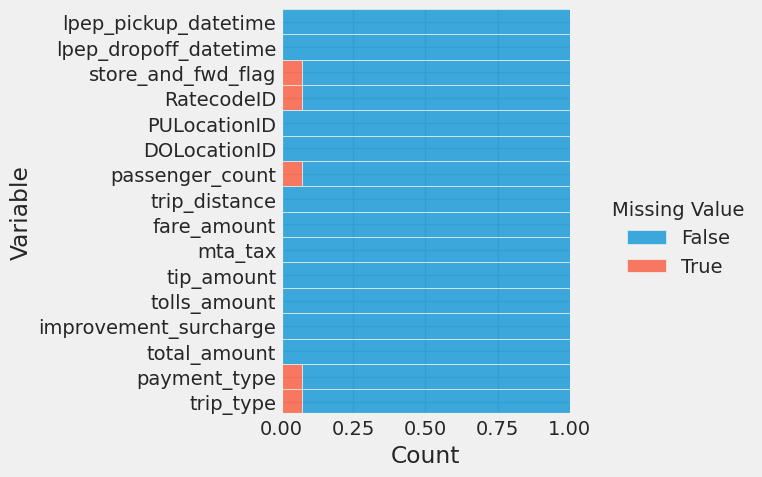

In [257]:
# Melihat missing value menggunakan seaborn untuk memudahkan secara visual
plt.figure(figsize=(10,4))
mv = sns.displot(
    data=df.isna().melt(value_name="Missing Value"),
    y="variable",
    hue="Missing Value",
    multiple="fill",
    aspect=1.25
)

mv.set(ylabel='Variable')
plt.show()

<Axes: >

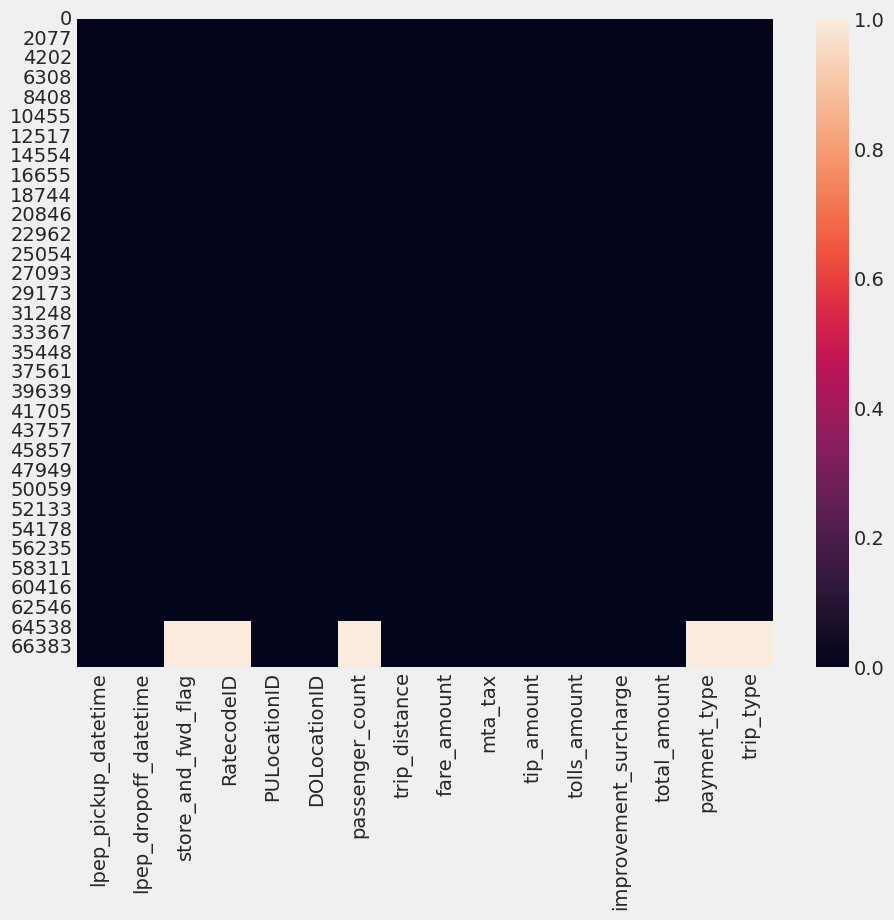

In [258]:
# Melihat sebaran Missing Value pada masing-masing variable kolom secara detail
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())

<Axes: >

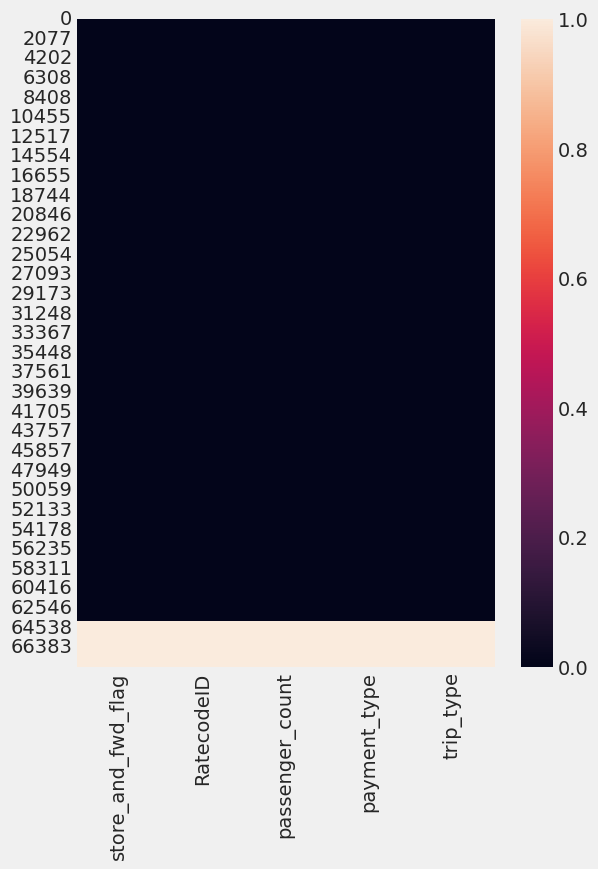

In [259]:
# Melihat 5 kolom variable yang memiliki sebaran Missing Value secara detail
plt.figure(figsize=(6,8))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type']].isna())

Overall, dari data diatas didapatkan informasi:

*   Missing value pada kolom variable `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type` dan `trip_type` memiliki proporsi yang sedikit (<10%).


Dalam menangani Missing Value, terdapat 2 cara yang dapat dilakukan, yaitu:

1.   **Menghapus baris/kolom yang berisikan missing value**

      Cara ini dapat digunakan apabila proporsi missing value tergolong sedikit seperti pada case kali ini. Jika proporsi missing value relatif kecil dibandingkan dengan ukuran dataset, penghapusan missing value dapat meningkatkan akurasi analisisa data *sehingga pada case kali ini disarankan menggunakan cara pertama ini dalam menangani missing value*.

2.   **Mengisi missing value**
      
      Cara ini dapat digunakan apabila proporsi missing value tergolong tinggi, sehingga apabila menangani missing value menggunakan cara pertama (menghapus baris/kolom yang berisikan missing value) akan berdampak besar terhadap keakuratan analisa data.

      Terdapat beberapa metode yang bisa digunakan untuk mengisi missing value, seperti:

    *   Mengisi data yang hilang dengan nilai sebenarnya atau sedekat mungkin dengan nilai asli (secara domain knowledge atau secara statistik) yang berkaitan dengan kolom yang memiliki missing value.
    *   Jika masih terdapat kolom yang tidak terisi, mengisi dengan angka mean, median atau modus adalah opsi lainnya.

In [260]:
# Menghapus data yang berisikan missing value (NaN)
df = df.dropna(axis=0)

In [261]:
# Melakukan check data yang berisikan missing value (NaN)
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

### ratecodeID

In [262]:
# Mengubah RatecodeID tipe data int menjadi category
df['RatecodeID'] = df['RatecodeID'].replace({1: 'Standard rate', 2: 'JFK', 3: 'Newark', 4: 'Nassau or Westchester', 5: 'Negotiated fare', 6: 'Group ride'})
df['RatecodeID'].value_counts()

Standard rate            53001
Negotiated fare          1451 
JFK                      144  
Nassau or Westchester    50   
Newark                   26   
Name: RatecodeID, dtype: int64

### payment_type

In [263]:
# Mengubah payment_type tipe data int menjadi category
df['payment_type'] = df['payment_type'].replace({1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'})
df['payment_type'].value_counts()

Credit card    34572
Cash           19758
No charge      278  
Dispute        64   
Name: payment_type, dtype: int64

### trip_type

In [264]:
# Mengubah trip_type tipe data int menjadi category
df['trip_type'] = df['trip_type'].replace({1: 'Street-hail', 2: 'Dispatch'})
df['trip_type'].value_counts()

Street-hail    53332
Dispatch       1340 
Name: trip_type, dtype: int64

## Data yang sudah bersih

In [265]:
# Melakukan check kolom category pada data
column_category = [column for column in df.columns if df[column].dtype == "object" ]
column_category

['store_and_fwd_flag', 'RatecodeID', 'payment_type', 'trip_type']

In [266]:
# Melakukan check jumlah kolom pada data
total_column = [column for column in df.columns if df[column].dtype == "float64" ] + [column for column in df.columns if df[column].dtype == "int64" ]
total_column

['passenger_count',
 'trip_distance',
 'fare_amount',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'PULocationID',
 'DOLocationID']

In [267]:
display(df.head(),df.tail())

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail
1,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.00,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
5,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,Cash,Street-hail
7,2023-01-01 00:11:58,2023-01-01 00:24:55,N,Standard rate,24,75,1.0,1.88,14.2,0.5,0.00,0.0,1.0,16.70,Cash,Street-hail


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
63882,2023-01-31 23:09:22,2023-01-31 23:17:21,N,Negotiated fare,130,205,1.0,2.75,15.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch
63883,2023-01-31 23:06:18,2023-01-31 23:17:03,N,Standard rate,65,181,1.0,2.44,13.5,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail
63884,2023-01-31 23:17:03,2023-01-31 23:23:04,N,Standard rate,244,116,1.0,1.40,9.3,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail
63885,2023-01-31 23:29:18,2023-01-31 23:38:50,N,Standard rate,74,238,1.0,2.47,13.5,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail
63886,2023-01-31 23:00:12,2023-01-31 23:10:08,N,Standard rate,95,95,1.0,1.39,11.4,0.5,4.17,0.0,1.0,18.07,Credit card,Street-hail


<ipython-input-269-8bccd0df6c16>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(total_column), i+1)
<ipython-input-269-8bccd0df6c16>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(total_column), i+1)


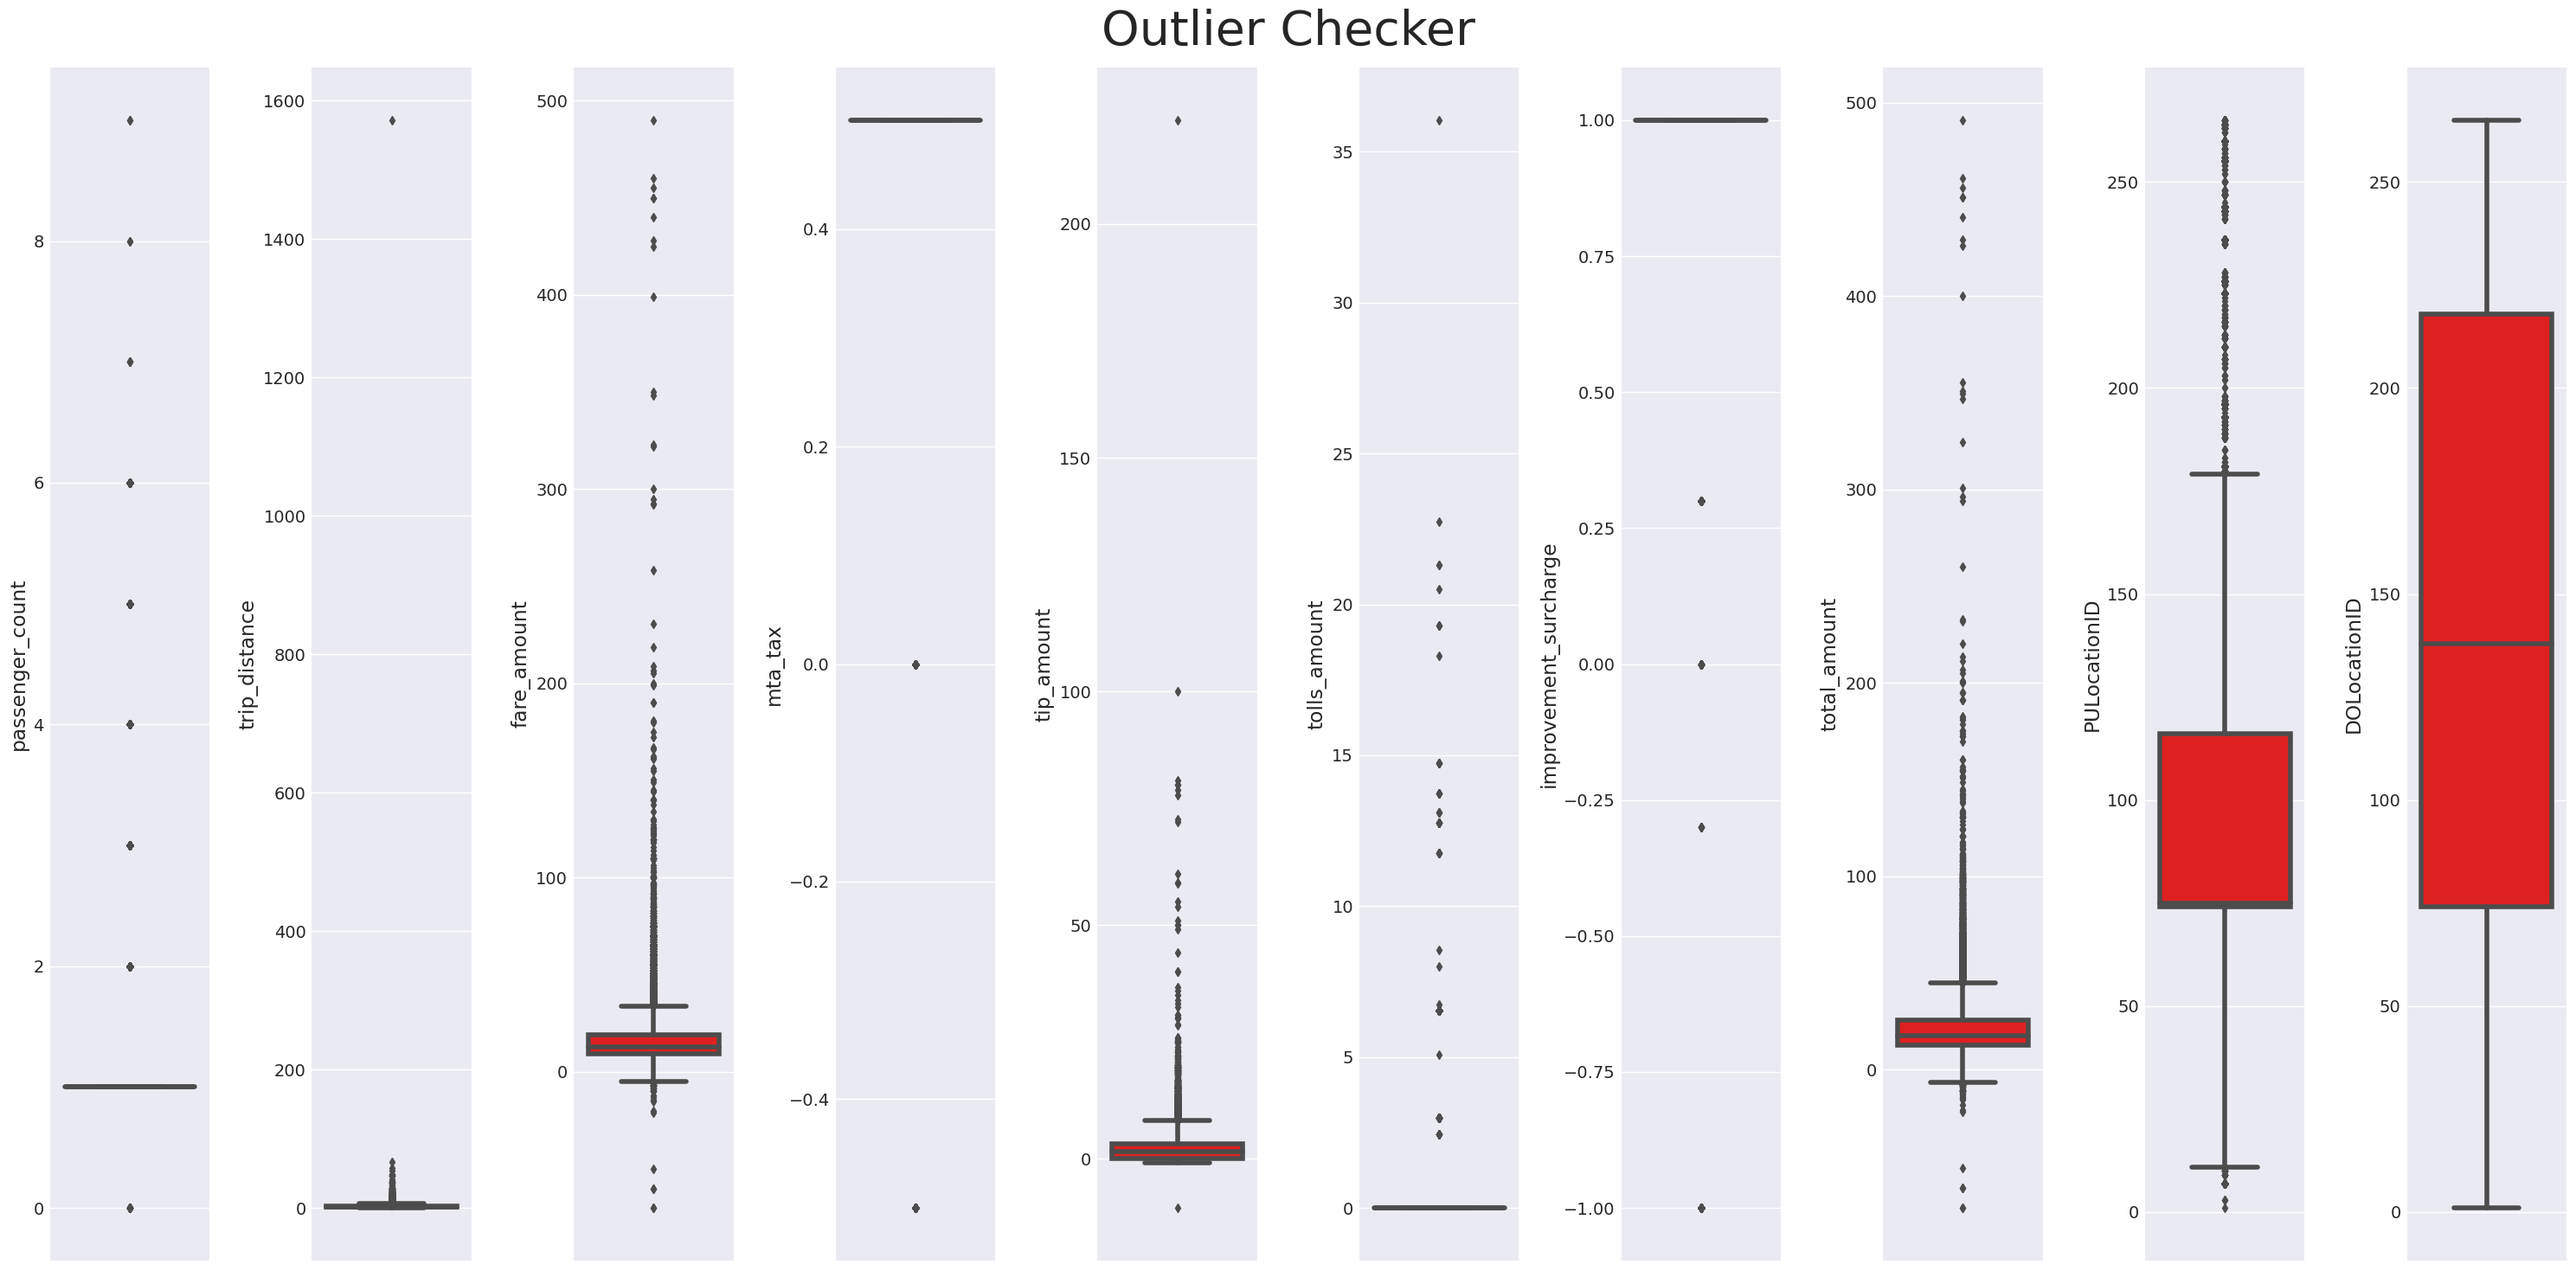

In [269]:
# Checking Outlier
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(30,15))
fig.suptitle('Outlier Checker',fontsize=40)

for i in range(0, len(total_column)):
    plt.subplot(1, len(total_column), i+1)
    sns.boxplot(y=df[total_column[i]], color = 'red', orient = 'v')
    plt.tight_layout()

> Hanya `DOLocationID` dan `PULocationID` yang tidak terdapat outlier karena termasuk data kategori.

> Sedangkan kolom variable lainnya terdapat outlier di semua data numericalnya.

Selamat! Data nya sudah bersih.

Selanjutnya, kita perlu export ke file Excel untuk data yang telah dibersihkan untuk keperluan visualisasi

In [271]:
df.to_excel('NYC_TLC_TripRecord_001.xlsx', index=False)


---

# Data Analysis

---

Kita sudah melakukan tahap data cleaning.

Sekarang, kita bisa mulai melakukan analisis untuk mencari **bagaimana cara meningkatkan profit perusahaan dan meningkatkan efektifitas lokasi pickup customer**.

Pertama-tama mari kita check terlebih dahulu apakah terdapat anomali pada data tersebut seperti hal yang tidak sesuai dengan domain knowledge yang ada.

## **Berdasarkan Total Amount yang Minus**

In [272]:
totalAmountMinus =  df[df['total_amount'] < 0]
print (len (totalAmountMinus))
print (len (totalAmountMinus)/len(df)*100)

174
0.3182616330114135


Pada umumnya, jika seorang pengemudi taksi melakukan pengantaran/trip, maka `total_amount` yang diperoleh tidaklah minus. Hal ini mengindikasikan terdapatnya anomali pada variable `total_amount`

In [273]:
df['payment_type'].value_counts()

Credit card    34572
Cash           19758
No charge      278  
Dispute        64   
Name: payment_type, dtype: int64

In [274]:
totalAmountMinus['payment_type'].value_counts()

No charge    139
Dispute      32 
Cash         3  
Name: payment_type, dtype: int64

Trip yang memiliki minus pendapatan dari variable `total_amount` terdapat di metode pembayaran `payment_type`:

*   No charge sekitar 80% dari total semua `payment_type`
*   Dispute sekitar 18% dari total semua `payment_type`
*   Cash sekitar 2% dari total semua `payment_type`

## Berdasarkan Lokasi Penumpang

In [275]:
# Menentukan 5 lokasi penjemputan/pickup penumpang teramai
df_locCust = df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'})
df_locCust.head()

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189


In [276]:
# Banyaknya data lokasi penjemputan/pickup penumpang
len(df_locCust)

188

In [277]:
# Terdapat banyak lokasi yang kurang efisien yang hanya memiliki total jumlah trip kurang dari 11.
dfLocationLess10 = df_locCust[df_locCust['count']<11]
dfLocationLess10 = dfLocationLess10.groupby('count').count().reset_index().sort_values('PULocationID', ascending=False)
dfLocationLess10['count'] = dfLocationLess10['count'].astype(str)
dfLocationLess10

,count,PULocationID
0,1,18
1,2,15
4,5,11
3,4,10
5,6,9
2,3,8
6,7,5
7,8,5
8,9,5
9,10,5


In [278]:
# Untuk meningkatkan peluang mendapatkan pelanggan, mari kita filter lokasi yang memiliki total jumlah trip lebih dari 11.

df_locCust['PULocationID'][df_locCust['count']>=11].sum()

13103

In [279]:
loc_less11_total = df_locCust['PULocationID'][df_locCust['count']<11].count()
loc_greater11_total = df_locCust['PULocationID'][df_locCust['count']>=11].count()

df_locCust_greaterLess11 = pd.DataFrame({
    'location' : ['kurang dari 11','lebih dari 11'],
    'count' : [loc_less11_total, loc_greater11_total]
})

In [280]:
df_locCust_greaterLess11

,location,count
0,kurang dari 11,91
1,lebih dari 11,97


In [281]:
# Dikarenakan distribusi yang diperoleh tidak normal (terdapatnya banyak outlier), maka digunakan median.
df_locCust['count'].median()

11.0

<function matplotlib.pyplot.show(close=None, block=None)>

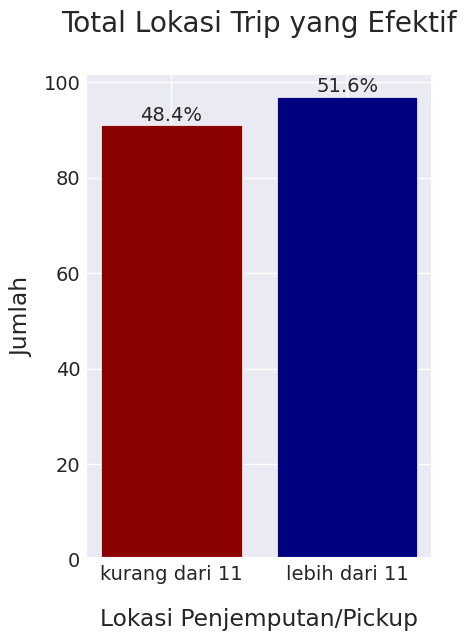

In [282]:
sns.set_style('darkgrid')
colors = ['#8b0000','#000080']

plt.figure(figsize= (4, 6))
plt.title('Total Lokasi Trip yang Efektif',pad=30)
plt.xlabel('Lokasi Penjemputan/Pickup',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)

plt.bar(df_locCust_greaterLess11['location'], df_locCust_greaterLess11['count'], color = colors)

total = sum(df_locCust_greaterLess11['count'])
for i, v in enumerate(df_locCust_greaterLess11['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Dari visualisasi total lokasi trip diatas, terdapat lokasi penjemputan yang kurang efektif (total jumlah penjemputan kurang dari 11) sebesar 48%.

In [283]:
# Total location penjemputan/pickup penumpang
df['PULocationID'].nunique()

188

In [284]:
# Total location penurunan/drop Off penumpang
df['DOLocationID'].nunique()

245

In [285]:
# Untuk meningkatkan peluang mendapatnya penumpang, kita bisa fokuskan untuk 10 lokasi teramai pickup
df_top10loc =  df['PULocationID'].value_counts().head(10).reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'})
df_top10loc['PULocationID'] = df_top10loc['PULocationID'].astype(str)
df_top10loc

,PULocationID,count
0,74,10565
1,75,7679
2,95,3725
3,41,3341
4,166,3189
5,82,2644
6,43,2638
7,97,1847
8,7,1708
9,42,1304


In [286]:
df['PULocationID'].value_counts().reset_index().rename(columns={'index':'PULocationID','PULocationID':'count'}).sum()

PULocationID    24838
count           54672
dtype: int64

In [287]:
df_top10loc['count'].sum()

38640

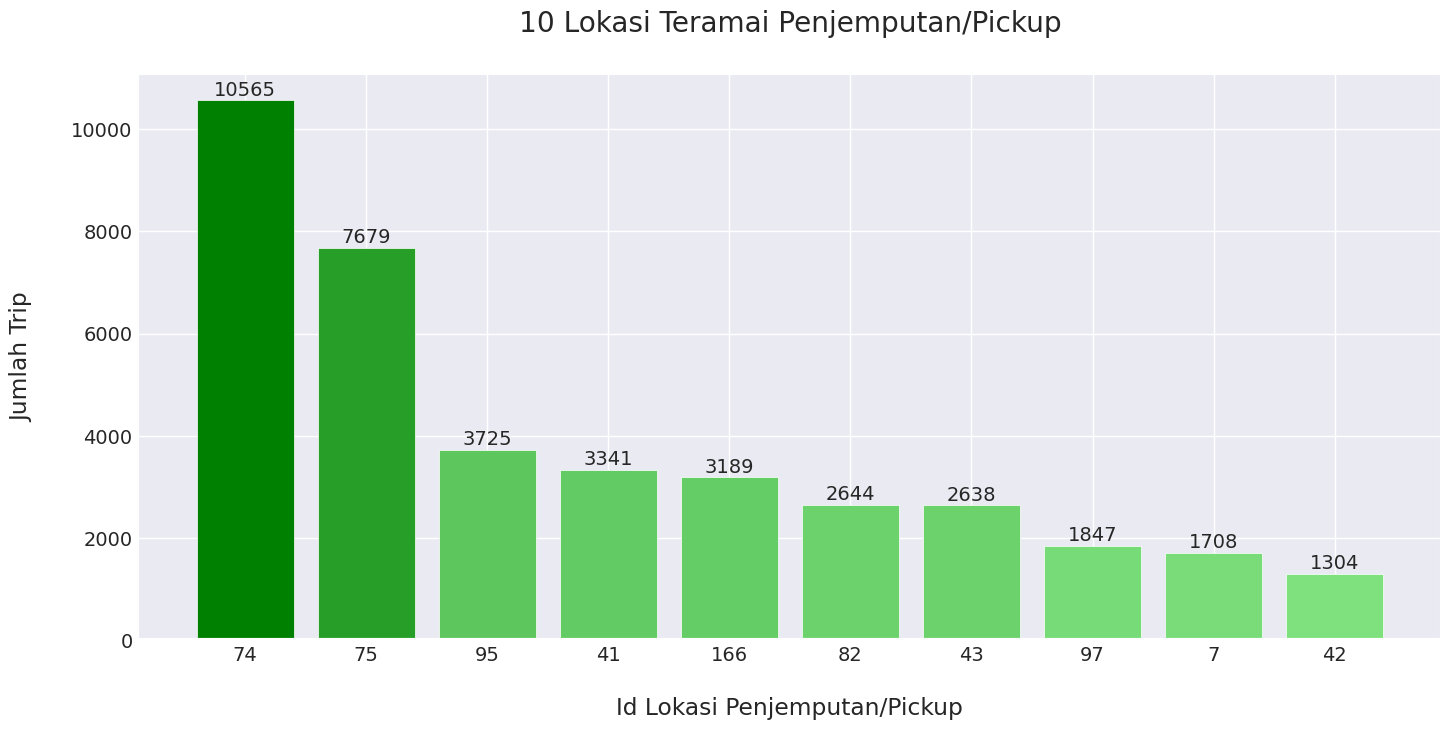

In [288]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_top10loc['count']) / max(df_top10loc['count'])
color_start = 'lightgreen'
color_end = 'Green'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (15, 7))
plt.title('10 Lokasi Teramai Penjemputan/Pickup', pad=30)
plt.xlabel('Id Lokasi Penjemputan/Pickup',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(df_top10loc['PULocationID'], df_top10loc['count'], color=cmap(normalized_heights))

for i, value in enumerate(df_top10loc['count']):
    plt.text(i, value + 100, str(value), ha='center')


plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

**Id Lokasi Pickup 74 memiliki jumlah trip tertinggi** dari yang lainnya.


> Rekkomendasi:
  > Mengarahkan taksi ke lokasi penjemputan/pickup yang ramai untuk meningkatkan efektivitas trip sehingga dapat meningkatkan profit perusahaan.

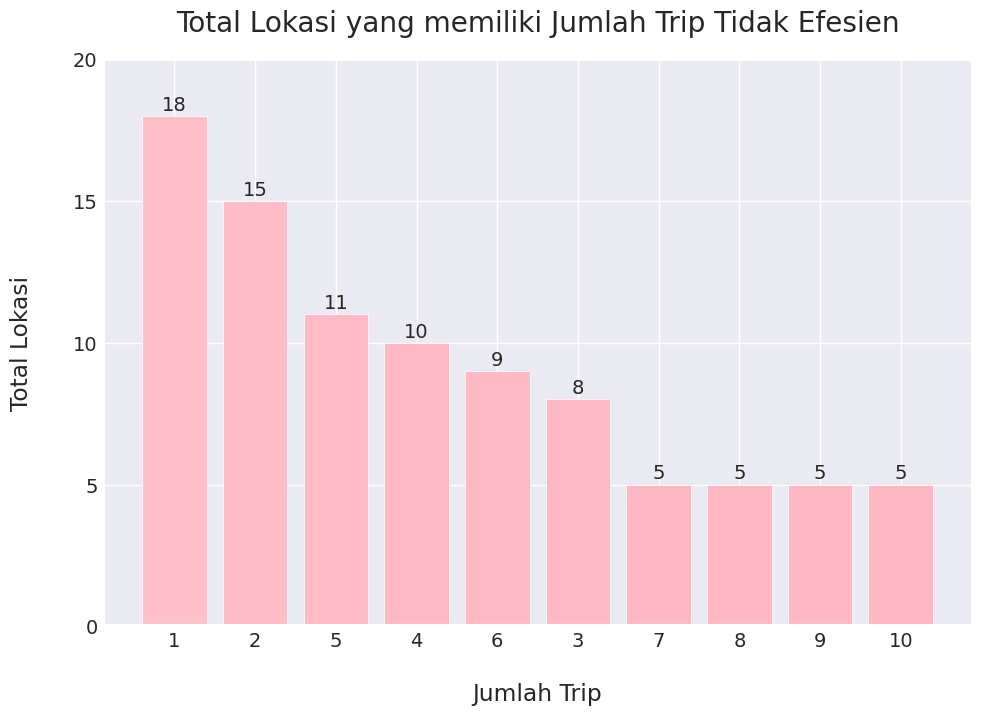

In [289]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_top10loc['count']) / max(df_top10loc['count'])
color_start = 'lightpink'
color_end = 'pink'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (10, 7))
plt.title('Total Lokasi yang memiliki Jumlah Trip Tidak Efesien',pad=20)

plt.xlabel('Jumlah Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Lokasi',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.bar(dfLocationLess10['count'], dfLocationLess10['PULocationID'], color=cmap(normalized_heights))
plt.ylim(0, 20)
plt.yticks(range(0, 21, 5))
for i, value in enumerate(dfLocationLess10['PULocationID']):
    plt.text(i, value +0.2, str(value), ha='center')

plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

Terdapat sebanyak **total 18 lokasi area yang berbeda yang jumlah tripnya hanya 1x, dimana hal tersebut dapat dikategorikan kurang efisien**


> Rekomendasi:
    
  > Menghindari lokasi area yang sepi penumpang untuk meningkatkan efesiensi trip dan profit perusahaan

## Berdasarkan Trip Type

In [290]:
dfTripType = df['trip_type'].value_counts().reset_index().rename(columns={'index':'trip_type','trip_type':'count'})

dfTripType

,trip_type,count
0,Street-hail,53332
1,Dispatch,1340


<function matplotlib.pyplot.show(close=None, block=None)>

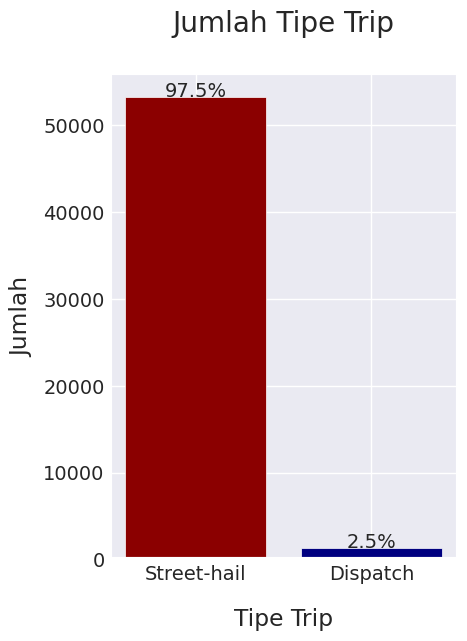

In [291]:
sns.set_style('darkgrid')
colors = ['#8b0000','#000080']

plt.figure(figsize= (4, 6))
plt.title('Jumlah Tipe Trip',pad=30)
plt.xlabel('Tipe Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.22, 0.5)

plt.bar(dfTripType['trip_type'], dfTripType['count'], color = colors)

total = sum(dfTripType['count'])
for i, v in enumerate(dfTripType['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Dari visualisasi diatas, informasi yang diperoleh berupa:

Jumlah Trip Dispatch (memesan terlebih dahulu) sangat sedikit (2.5%) jika dibandingkan dengan Street-hail (memesan langsung di jalan).

> Rekomendasi:
    
  > Sebaiknya perusahaan dapat meningkatkan peforma dan kualitas aplikasi maupun pelayanan pemesanan terlebih dahulu. Hal ini bertujuan untuk mengimbangi sumber tipe trip yang diperoleh oleh driver taksi sehingga tidak terlalu bergantung pada tipe street-hail (pemesanan secara langsung dari jalan) sehingga dapat bersaing untuk menarik penumpang dari kompetitor seperti Uber. Hal ini sangat direkomendasikan agar perusahaan berbisnis mengikuti era teknologi sekarang dan dapat meningkatkan profit perusahaan.

## Berdasarkan Trip Distance

In [292]:
tripDistance_0 = df[df['trip_distance'] == 0 ]
len(tripDistance_0)

1709

In [293]:
tripDistance_0.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,Standard rate,223,179,1.0,0.0,7.2,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail
58,2023-01-01 00:57:15,2023-01-01 01:00:15,N,Standard rate,75,75,1.0,0.0,4.4,0.5,1.38,0.0,1.0,8.28,Credit card,Street-hail
99,2023-01-01 01:27:36,2023-01-01 01:27:43,N,Negotiated fare,168,168,0.0,0.0,20.0,0.0,0.00,0.0,1.0,21.00,Credit card,Dispatch
107,2023-01-01 01:11:13,2023-01-01 01:11:36,N,Standard rate,7,7,1.0,0.0,3.0,0.5,9.00,0.0,1.0,14.50,Credit card,Street-hail
115,2023-01-01 01:52:58,2023-01-01 01:53:00,N,Standard rate,264,264,1.0,0.0,3.0,0.5,21.50,0.0,0.3,26.30,Credit card,Street-hail


In [294]:
len(df)

54672

In [298]:
df_tripDist0 = pd.DataFrame({
    'Trip_distance' : ['Trip Distance 0','Normal'],
    'count' : [len(tripDistance_0),len(df)]
})
df_tripDist0

,Trip_distance,count
0,Trip Distance 0,1709
1,Normal,54672


<function matplotlib.pyplot.show(close=None, block=None)>

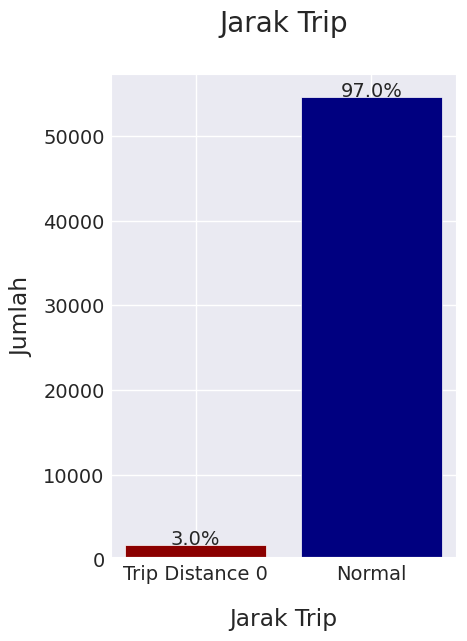

In [299]:
sns.set_style('darkgrid')
colors = ['#8b0000','#000080']

plt.figure(figsize= (4, 6))
plt.title('Jarak Trip',pad=30)
plt.xlabel('Jarak Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.22, 0.5)

plt.bar(df_tripDist0['Trip_distance'], df_tripDist0['count'], color = colors)

total = sum(df_tripDist0['count'])
for i, v in enumerate(df_tripDist0['count']):
    percent = v / total * 100
    plt.text(i, v + 1, f'{percent:.1f}%', ha='center')

plt.show

Dari visualisasi diatas, informasi yang diperoleh berupa:

Terdapat anomali, yaitu Trip Distance 0 sebesar 3%.

Hal ini memiliki kemungkinan alat pengukur jarak (taximeter) pada beberapa taksi mengalami kerusakan sehingga ada beberapa perjalanan taxi yg memiliki jarak pengantaran 0.

> Rekomendasi:

  > Melakukan pengecekan taksi secara berkala untuk menghindari kemungkinan kecurangan dari pihak supir taksi karena tidak terekamnya data pengukur jarak. Hal tersebut juga dapat menurunkan tingkat kepercayaan penumpang karena rusaknya taximeter atau alat pengukur jarak.

## Berdasarkan Waktu (Time) Terbaik

In [300]:
from datetime import datetime

df['day'] = pd.to_datetime(df['lpep_pickup_datetime']).apply(lambda x: datetime.strftime(x, '%A'))

In [302]:
# Mencari hari paling ramai/banyak penumpang berdasarkan total tripnya
df_hari = df['day'].value_counts().reset_index().rename(columns={'index':'Day','day':'Count'})
df_hari

,Day,Count
0,Tuesday,9006
1,Thursday,8112
2,Friday,8000
3,Wednesday,7970
4,Monday,7904
5,Saturday,6939
6,Sunday,6741


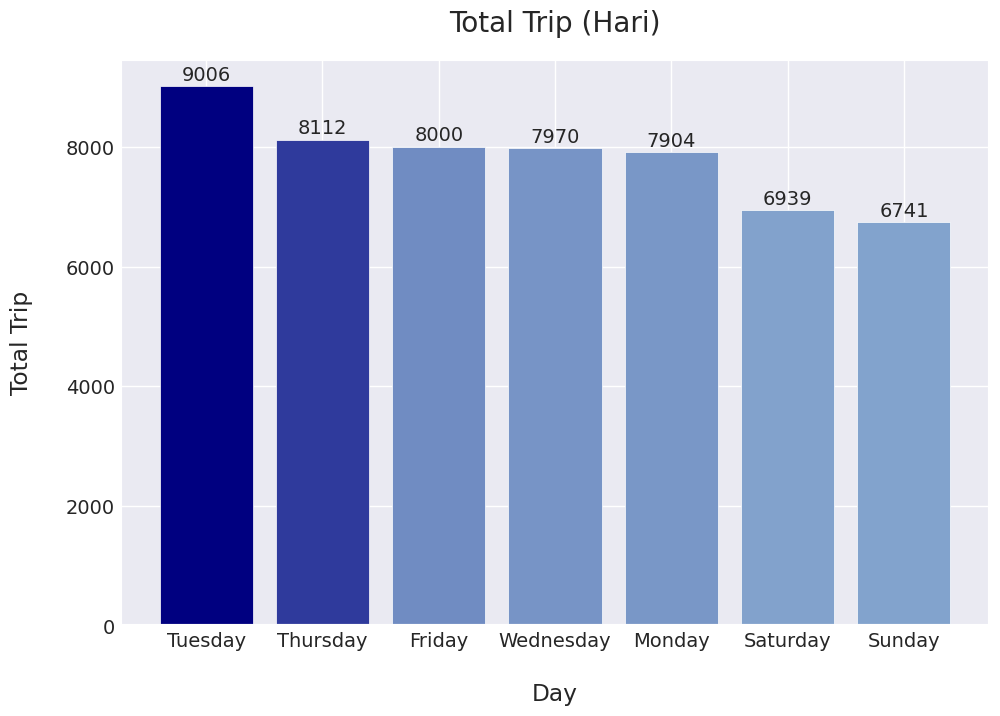

In [306]:
sns.set_style('darkgrid')

normalized_heights = np.array(df_top10loc['count']) / max(df_top10loc['count'])
color_start = 'lightblue'
color_end = 'Navy'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (10, 7))
plt.title('Total Trip (Hari)',pad=20)
plt.xlabel('Day',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_hari['Day'], df_hari['Count'], color=cmap(normalized_heights))

for i, value in enumerate(df_hari['Count']):
    plt.text(i, value + 100, str(value), ha='center')

plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

**Hari selasa adalah hari paling ramai atau paling banyak penumpang berdasarkan dari total tripnya.**

In [311]:
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df_jam = df['hour'].value_counts().reset_index().rename(columns={'index':'Hour','hour':'Count'}).sort_values('Hour',ascending=True)
df_jam = df_jam.reset_index(drop=True)
df_jam

,Hour,Count
0,0,947
1,1,740
2,2,518
3,3,470
4,4,346
5,5,313
6,6,690
7,7,1971
8,8,2446
9,9,2651


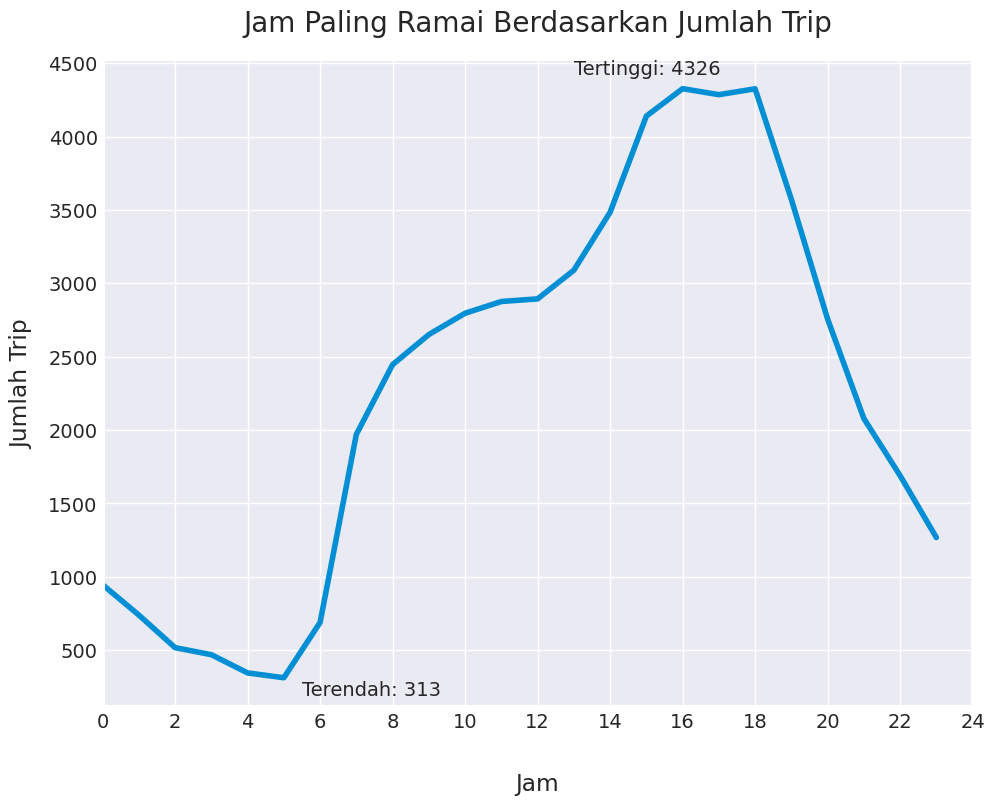

In [321]:
# Menentukan jam paling ramai
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,8))
plt.plot(df_jam['Hour'],df_jam['Count'])

plt.title('Jam Paling Ramai Berdasarkan Jumlah Trip',pad=20)
plt.xlabel('Jam',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Jumlah Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.08, 0.5)

plt.xlim(0, 24)
plt.xticks(range(0, 25, 2))

max_value = max(df_jam['Count'])
min_value = min(df_jam['Count'])

max_val1 = df_jam[df_jam['Count'] == max_value]
min_val1 = df_jam[df_jam['Count'] == min_value]

plt.annotate(f'Tertinggi: {max_value}', (max_val1['Hour'], max_val1['Count']),
             xytext=(max_val1['Hour']-3, max_val1['Count']+ 100))

plt.annotate(f'Terendah: {min_value}', (min_val1['Hour'], min_val1['Count']),
             xytext=(min_val1['Hour']+0.5, min_val1['Count']-120))


plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

*   **Jam paling ramai** berdasarkan dari jumlah tripnya berada di **jam 12 siang hingga 20 malam.**
*   **Jam paling sepi** berdasarkan dari jumlah tripnya berada di **jam 0 dini hari hingga 6 pagi.**

> Rekomendasi:

> Memfokuskan pada jam paling ramai dengan menambah jumlah taksi di jam tersebut. Selain itu, jumlah taksi dapat dikurangi pada jam paling sepi.

> **Waktu yang paling ramai berdasarkan jumlah trip adalah pada hari Selasa pada pukul 12 siang hingga 20 malam sehingga perusahaan dapat mengalokasikan lebih banyak taksi pada waktu tersebut.**

In [323]:
from math import ceil

df['duration']=df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']
df['duration'].head()

# menghitung total menit dari durasi dan pembulatan detik ke menit
df['durationinMinutes'] = df['duration'].apply(lambda x: ceil(x.total_seconds() / 60))
df['durationinMinutes']

0        12
1        7 
2        7 
5        18
7        13
         ..
63882    8 
63883    11
63884    7 
63885    10
63886    10
Name: durationinMinutes, Length: 54672, dtype: int64

## Berdasarkan Passenger Count

In [326]:
df_passenger = df['passenger_count'].value_counts().reset_index().rename(columns={'index':'Passenger_count','passenger_count':'Count'})
df_passenger['Passenger_count'] = df_passenger['Passenger_count'].astype(int)
df_passenger['Passenger_count'] = df_passenger['Passenger_count'].astype(str)
df_passenger

,Passenger_count,Count
0,1,46465
1,2,4257
2,5,1761
3,6,1049
4,3,779
5,4,329
6,0,24
7,7,4
8,9,2
9,8,2


In [329]:
df_passenger['Passenger_count'] = df_passenger['Passenger_count'].astype(int)
pasC_Gr4 = df_passenger['Count'][df_passenger['Passenger_count']>4].sum()
pasC_Ls4 = df_passenger['Count'][df_passenger['Passenger_count']<=4].sum()

print(pasC_Gr4)
print(pasC_Ls4)

2818
51854


In [330]:
df_passenger['Passenger_count'] = df_passenger['Passenger_count'].astype(str)

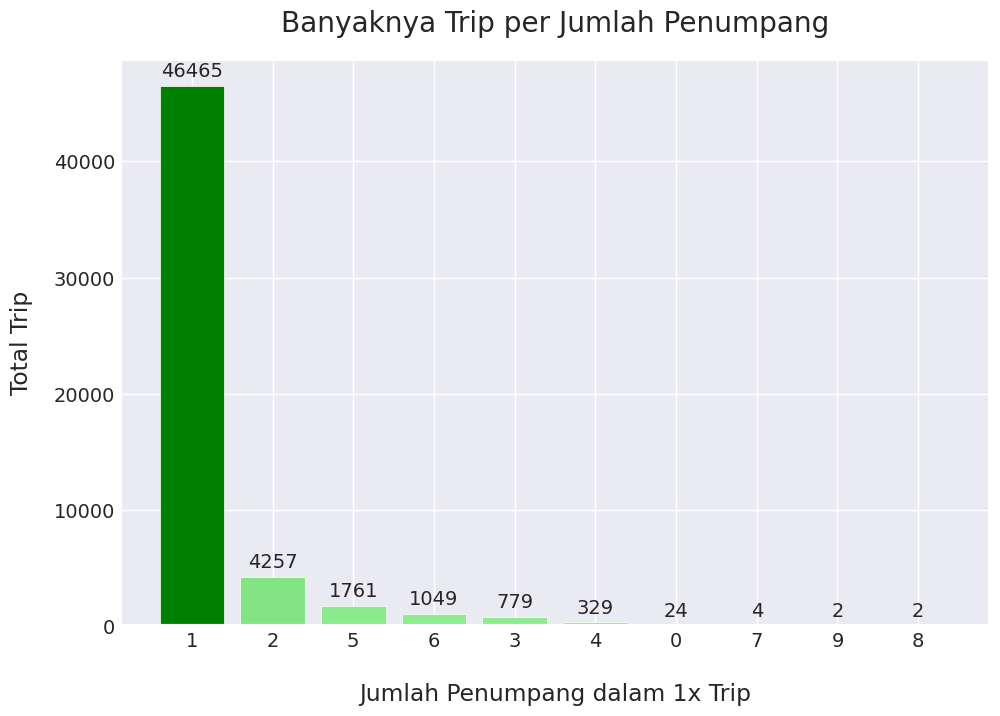

In [341]:
sns.set_style('darkgrid')
normalized_heights = np.array(df_passenger['Count']) / max(df_passenger['Count'])
color_start = 'lightgreen'
color_end = 'green'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (10, 7))
plt.title('Banyaknya Trip per Jumlah Penumpang',pad=20)
plt.xlabel('Jumlah Penumpang dalam 1x Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.1, 0.5)

plt.bar(df_passenger['Passenger_count'], df_passenger['Count'], color=cmap(normalized_heights))

for i, value in enumerate(df_passenger['Count']):
    plt.text(i, value + 800, str(value), ha='center')

plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

jumlah penumpang yang hanya berisi 1 penumpang dengan 1x Trip menjadi yang paling banyak dengan 46,465 orang.

In [345]:
df_passenger_gr_ls = pd.DataFrame({
    'Passenger' : ['Greater than 4','Less than 4'],
    'Count' : [pasC_Gr4,pasC_Ls4]
})
df_passenger_gr_ls

,Passenger,Count
0,Greater than 4,2818
1,Less than 4,51854


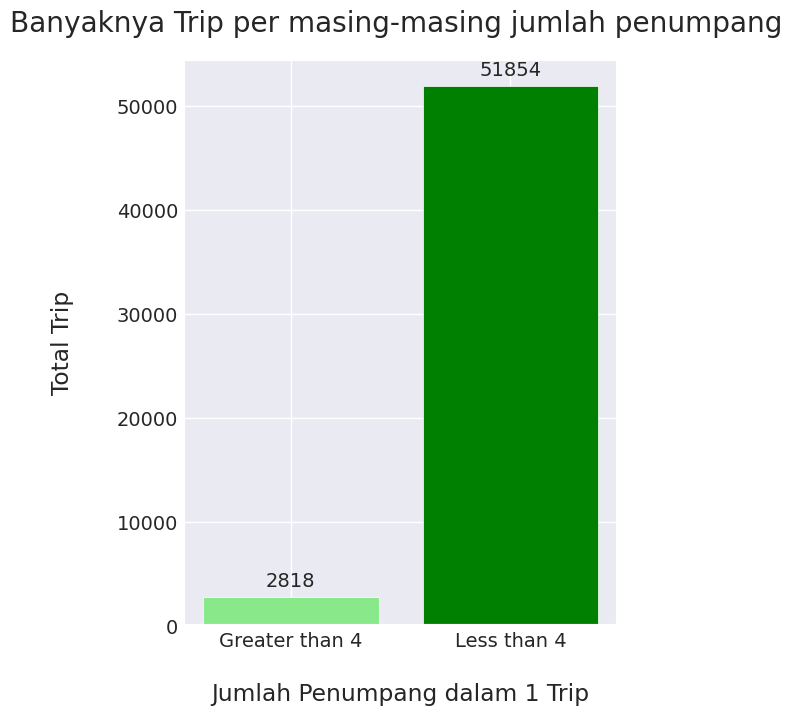

In [349]:
# Menghitung skala warna berdasarkan nilai
normalized_heights = np.array(df_passenger_gr_ls['Count']) / max(df_passenger_gr_ls['Count'])
color_start = 'lightgreen'
color_end = 'Green'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])


plt.figure(figsize= (5, 7))
plt.title('Banyaknya Trip per masing-masing jumlah penumpang ',pad=20)
plt.xlabel('Jumlah Penumpang dalam 1 Trip',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.25, 0.5)

plt.bar(df_passenger_gr_ls['Passenger'], df_passenger_gr_ls['Count'], color=cmap(normalized_heights))

for i, value in enumerate(df_passenger_gr_ls['Count']):
    plt.text(i, value + 1000, str(value), ha='center')

plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

*   Jumlah penumpang dalam 1 taksi per 1x trip paling banyak adalah kurang dari 4 penumpang. Akan tetapi, masih terdapat sekitar 5% untuk jumlah penumpang dalam 1 taksi per 1x trip yang lebih dari 4 orang.

In [351]:
df['passenger_count'] = df['passenger_count'].astype(int)
df_locationPsg_Gr4 = df[['PULocationID']] [df['passenger_count']>4].value_counts().reset_index().head(10).rename(columns={0:'Count'})
df_locationPsg_Gr4['PULocationID'] = df_locationPsg_Gr4['PULocationID'].astype(str)
df_locationPsg_Gr4

,PULocationID,Count
0,74,576
1,75,570
2,166,186
3,95,183
4,41,152
5,43,145
6,244,128
7,82,117
8,260,98
9,7,81


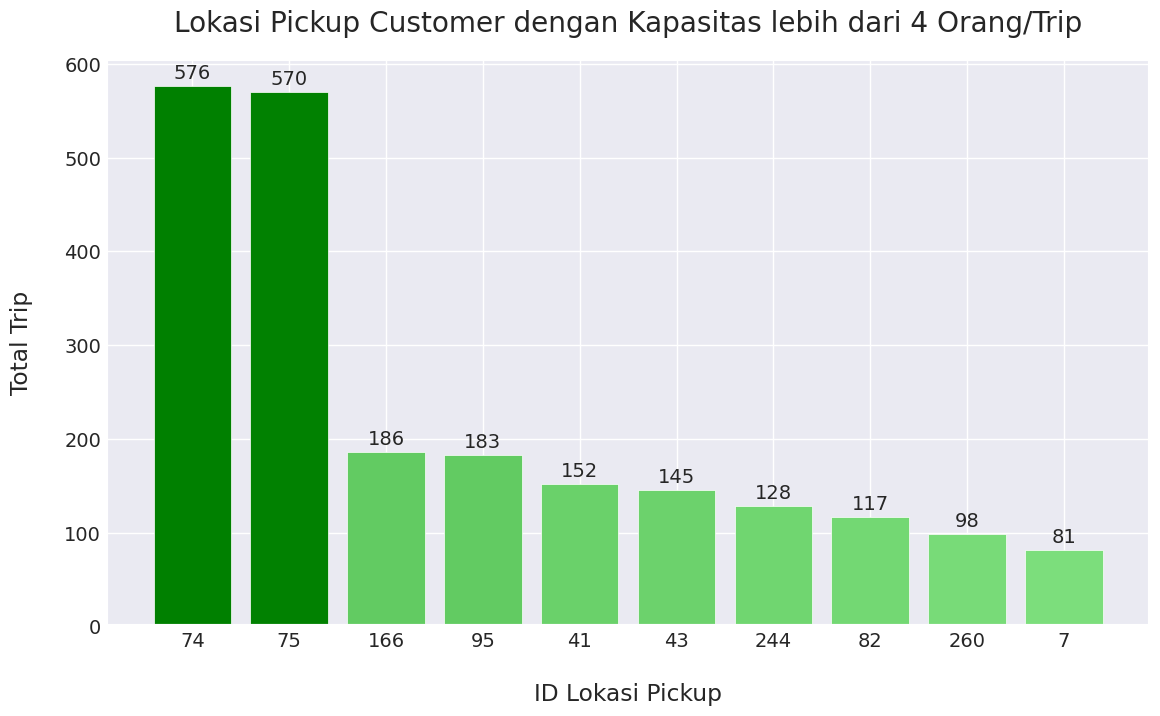

In [361]:
# Lokasi Penjemputan/Pickup Penumpang yang lebih dari 4 Orang dalam 1 taksi per 1x trip

normalized_heights = np.array(df_locationPsg_Gr4['Count']) / max(df_locationPsg_Gr4['Count'])
color_start = 'lightgreen'
color_end = 'green'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (12, 7))

plt.title('Lokasi Pickup Customer dengan Kapasitas lebih dari 4 Orang/Trip', pad=20)
plt.xlabel('ID Lokasi Pickup',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Trip',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.07, 0.5)

plt.bar(df_locationPsg_Gr4['PULocationID'], df_locationPsg_Gr4['Count'], color=cmap(normalized_heights))

for i, value in enumerate(df_locationPsg_Gr4['Count']):
    plt.text(i, value + 8, str(value), ha='center')

plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

ID lokasi pickup 74 dan 75 adalah lokasi yang memiliki jumlah trip terbanyak dengan jumlah customer lebih dari 4 orang per 1x trip nya.

> Rekomendasi:
    
  > Dapat difokuskan untuk Taksi dengan kapasitas lebih dari 4 orang di lokasi-lokasi ini.

## Berdasarkan Income

In [366]:
# Pendapatan per Tahun
incomePerYear = df.groupby(df['lpep_dropoff_datetime'].dt.year)['total_amount'].sum()
incomePerYear

lpep_dropoff_datetime
2009    43.20     
2022    52.40     
2023    1161193.25
Name: total_amount, dtype: float64

In [367]:
# Pendapatan per Bulan
incomePerMonth = df.groupby(df['lpep_dropoff_datetime'].dt.month)['total_amount'].sum()
incomePerMonth

lpep_dropoff_datetime
1     1160925.59
2     310.86    
12    52.40     
Name: total_amount, dtype: float64

In [380]:
df_amountIn2023 = df[['lpep_dropoff_datetime','total_amount']][df['lpep_dropoff_datetime'].dt.year == 2023]
df_amountIn2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


In [381]:
df_amountJan2023 = df_amountIn2023[df_amountIn2023['lpep_dropoff_datetime'].dt.month == 1]
df_amountJan2023

,lpep_dropoff_datetime,total_amount
0,2023-01-01 00:37:11,24.18
1,2023-01-01 00:57:49,15.84
2,2023-01-01 00:41:32,11.64
5,2023-01-01 01:11:04,22.95
7,2023-01-01 00:24:55,16.70
...,...,...
63882,2023-01-31 23:17:21,17.30
63883,2023-01-31 23:17:03,19.20
63884,2023-01-31 23:23:04,14.16
63885,2023-01-31 23:38:50,22.50


Terdapat perbedaan Income dari Total Amount pada tahun 2023 dengan bulan Januari 2023. Oleh karena itu, mari kita lanjutkan pengecheckan income menjadi per minggu agar dapat melihat lebih detail.

In [382]:
# Pendapatan per Minggu
dfInWeek = df_amountJan2023[['lpep_dropoff_datetime','total_amount']]

dfInWeek['lpep_dropoff_datetime'] = pd.to_datetime(dfInWeek['lpep_dropoff_datetime'])

incomeInWeekly = dfInWeek.groupby(pd.Grouper(key='lpep_dropoff_datetime', freq='W-MON')).sum().reset_index()
incomeInWeekly['lpep_dropoff_datetime'] = incomeInWeekly['lpep_dropoff_datetime'].astype(str)
incomeInWeekly

,lpep_dropoff_datetime,total_amount
0,2023-01-02,51483.72
1,2023-01-09,260190.50
2,2023-01-16,260546.01
3,2023-01-23,271799.21
4,2023-01-30,276942.30
5,2023-02-06,39920.65


In [384]:
incomeInWeekly = incomeInWeekly.iloc[1:5]

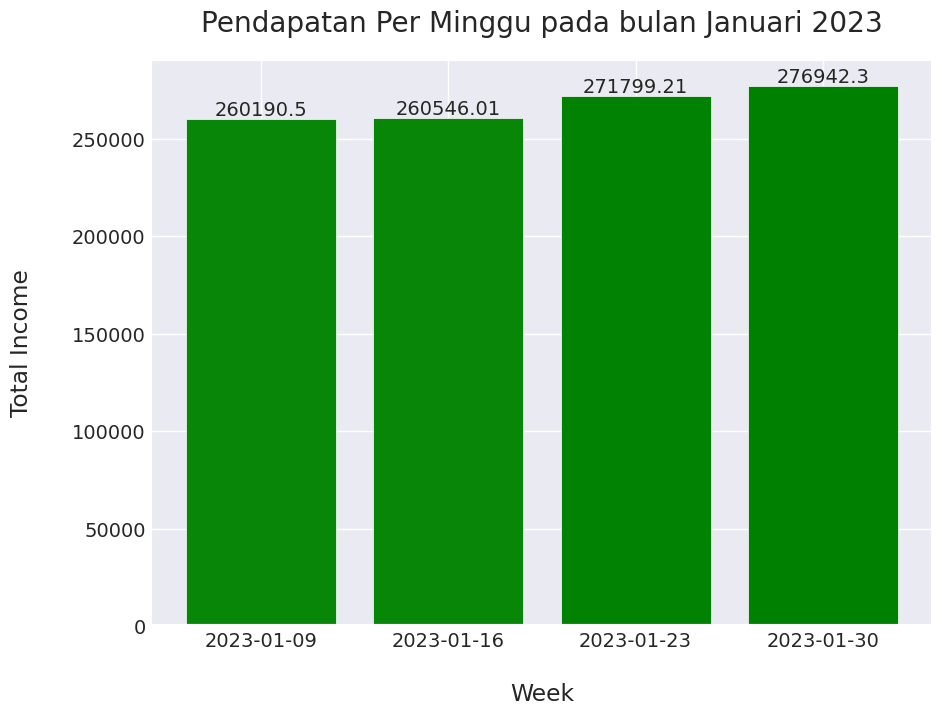

In [388]:
normalized_heights = np.array(incomeInWeekly['total_amount']) / max(incomeInWeekly['total_amount'])
color_start = 'lightgreen'
color_end = 'green'
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_start, color_end])

plt.figure(figsize= (9, 7))

plt.bar(incomeInWeekly['lpep_dropoff_datetime'], incomeInWeekly['total_amount'], color=cmap(normalized_heights))

plt.title('Pendapatan Per Minggu pada bulan Januari 2023',pad=20)
plt.xlabel('Week',labelpad=20)
plt.gca().xaxis.set_label_coords(0.5, -0.1)
plt.ylabel('Total Income',labelpad=20)
plt.gca().yaxis.set_label_coords(-0.15, 0.5)


for i, value in enumerate(incomeInWeekly['total_amount']):
    plt.text(i, value + 2000, str(value), ha='center')

plt.show()

Dari visualisasi diatas, informasi yang diperoleh berupa:

Terdapat peningkatan income secara perlahan di setiap minggu nya pada bulan January 2023.

# Kesimpulan dan Rekomendasi

*   Lokasi pickup saat ini masih kurang efisien (48%).
*   Id Lokasi Pickup 74 memiliki jumlah trip tertinggi dari yang lainnya.
*   Terdapat sebanyak 18 lokasi area yang berbeda yang jumlah tripnya hanya 1x dan masih kurang efisien.
*   Jumlah Trip Dispatch (memesan terlebih dahulu) sangat sedikit (2.5%) jika dibandingkan dengan Street-hail (memesan langsung di jalan).
*   Hari selasa merupakan hari paling ramai berdasarkan jumlah trip dan hari minggu adalah hari yang paling sepi.
*   Jam trip paling ramai dari jumlah trip mulai dari jam 12 siang hingga 20 malam dan jam paling sepi dari jumlah trip dari jam 0 dini hari hingg 6 pagi.
*   Jumlah penumpang yang hanya berisi 1 penumpang dengan 1x Trip menjadi yang paling banyak dengan 46,465 orang.
*   ID lokasi pickup 74 dan 75 adalah lokasi yang memiliki jumlah trip terbanyak dengan jumlah customer lebih dari 4 orang per 1x trip nya.
*   Terdapat peningkatan income secara perlahan di setiap minggu nya pada bulan January 2023.

## Rekomendasi

Berdasarkan hasil analisa pada data New York City TLC Trip Record, untuk meningkatkan efektifitas lokasi pickup customer dan dapat meningkatkan profit perusahaan, dapat dilakukan beberapa cara seperti:

*   Mengalokasikan lebih banyak jumlah taksi pada lokasi pickup dengan jumlah trip tertinggi seperti pada ID Lokasi Pickup 74.
*   Memfokuskan pada waktu paling ramai mulai pukul 12 siang hingga 20 malam terutama pada hari selasa karena merupakan hari paling ramai berdasarkan jumlah trip.
*   Meningkatkan kualitas dan performa aplikasi maupun layanan pesan terlebih dahulu agar dapat meningkatkan profit dan efektifitas lokasi pickup customer.
*   Memfokuskan pada ID Lokasi Pickup 74 dan 75 untuk jumlah customer lebih dari 4 orang per 1x tripnya karena memiliki jumlah trip terbanyak dibanding lainnya.